# Part 2

In Part 1 of this assignment, we looked at Linear Regression and built a model from scratch. In practice, we usually do not build models from scratch, but use already available ones. Scikit-Learn provides a vast variety of models. You can have a look at a few different options available here (completely optional): <br>
* Overall Supervised Learning: https://scikit-learn.org/stable/supervised_learning.html <br>
* Classification: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html <br> 

Feel free to explore other models available in scikit learn. 

### Context

The tech industry has observed a tremendous rise over the past decade whereby its growing advancements have made it a dream workplace for people around the globe. Consequently, a large influx of employees is observed in the tech-industry every year. However, the competitive and fast-paced environment does offer its own consequences. It is time to analyze the prevalence of mental health issues faced by employees in tech companies and the factors affecting them.

In this Part, we will use a dataset called **Mental Health in Tech Companies** and check if we could use features related to work environment and other work-related factors of a tech employ to predict whether they suffer from mental health issues or not. 

In [95]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import pickle
from sklearn import preprocessing

**Question 0 (a):** To make things easier, you have been provided with cleaned dataset in data_tech.pkl (a pickle file). Read the file into the dataframe data_tech.

**Note:** You may need to further clean and modify the dataframe based on your model/choice of features.  

In [96]:
with open('data_tech.pkl', 'rb') as f:
    data = pickle.load(f)
data_tech = data
data_tech.head(5)

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,issue,age_group
0,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,45+
1,36,Male,France,Yes,Yes,No,NaN,6-25,Yes,Yes,...,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,No,35-44
2,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,Maybe,No,Some of them,Some of them,No,No,No,No,Yes,25-34
3,31,Male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,No,No,Some of them,Some of them,No,Maybe,Yes,No,Yes,25-34
4,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Maybe,No,Some of them,Yes,No,Maybe,No,No,Yes,45+


**Question 0 (b):** Since selecting features is an important part of creating of your model, you should have a clear idea about the different columns in the dataset. Read the column descriptions from the file columns.csv into the dataframe columns and understand them. Now analyze them in data_tech using an relevant techniques. You may want to do some additional data cleaning and EDA 

**Hint:** functions like .info(), .describe() etc might be helpful. You can also have a look at the concepts used in Assignment 2/EDA Phase

In [97]:
cols = pd.read_csv('columns.csv')
columns = cols
# columns
# Write EDA code here
data_tech = data_tech.drop(['tech_company'], axis=1)
data_tech.reset_index(drop=True, inplace=True)

Now that you have familiarzied yourself with the dataset, it is time to create your model!

### Feature Engineering

We want to make use of our features to predict whether an employee in the tech-industry would have mental health issues or not. 
Before making use of our features to predict whether an employee in the tech-industry would have mental health issues or not, we need to transform our raw features into new numerical/encoded features that the model could interpret i.e., we will start with feature engineering.

**Question 1:** Choose your own attributes that you would like to have in your feature set. Encode them into numerical values. This can be a iterative step, therefore, feel free to come back to this question and add/remove features.

**Hint:** You can use any encoding technique, either manually or using libraries like scikit learn. 

In [98]:
# Enter Code here
le = preprocessing.LabelEncoder()
for i in range(1, data_tech.shape[1]):
    data_tech.iloc[:,i] = le.fit_transform(data_tech.iloc[:,i])

data_tech

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,issue,age_group
0,46,1,42,1,1,0,3,0,1,2,...,1,1,2,2,1,2,2,1,1,3
1,36,1,14,1,1,0,4,4,1,1,...,1,1,1,1,0,0,0,0,0,2
2,29,1,42,0,1,1,3,1,0,2,...,0,1,1,1,1,1,1,0,1,1
3,31,1,42,1,0,0,0,0,1,1,...,1,1,1,1,1,0,2,0,1,1
4,46,1,42,0,0,1,1,2,1,2,...,0,1,1,2,1,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,29,1,42,0,1,1,3,1,1,2,...,2,1,1,0,1,0,1,0,1,1
1009,26,1,41,0,0,1,4,2,0,1,...,1,1,1,1,1,1,0,0,0,1
1010,32,1,42,0,1,1,1,2,1,2,...,1,1,1,2,1,1,2,0,1,1
1011,34,1,42,0,1,1,3,5,0,2,...,2,2,0,0,1,1,1,0,1,1


**Question 2:** Create a correlation matrix to see how do your selected features correlate with each other and **the test attribute**. 

In [99]:
# Enter Code here
data_tech.corr()

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,issue,age_group
age,1.000000,0.083423,0.142480,0.067745,0.004097,0.072275,-0.081873,0.028827,0.157840,0.145100,...,0.046704,-0.039227,-0.010195,0.007333,0.057525,-0.023401,-0.018774,0.062745,0.085578,0.778886
gender,0.083423,1.000000,-0.113310,0.038615,-0.085118,-0.147477,-0.026732,0.023949,0.002646,-0.063930,...,0.023336,0.043246,0.049202,0.081749,-0.063387,-0.032702,-0.009686,-0.045831,-0.059764,0.091443
country,0.142480,-0.113310,1.000000,-0.137354,0.063528,0.094950,-0.016290,0.106319,-0.020393,0.108901,...,-0.030013,-0.010288,-0.026264,0.014168,0.079650,-0.006112,-0.018802,-0.026829,0.046296,0.127073
self_employed,0.067745,0.038615,-0.137354,1.000000,0.016551,0.019603,-0.047667,-0.359799,0.307442,-0.055751,...,0.024553,0.003297,0.070403,0.047310,-0.012044,-0.030267,0.130766,0.089919,0.055629,0.058448
family_history,0.004097,-0.085118,0.063528,0.016551,1.000000,0.390462,0.028915,-0.034662,0.022965,0.094371,...,0.013165,0.028359,0.014127,0.019728,0.045923,0.065381,0.038473,0.119396,0.232887,-0.028840
treatment,0.072275,-0.147477,0.094950,0.019603,0.390462,1.000000,-0.031759,-0.039587,0.035044,0.219866,...,0.009539,-0.014044,0.095373,-0.033341,0.107225,0.070737,0.039575,0.114531,0.498748,0.042945
work_interfere,-0.081873,-0.026732,-0.016290,-0.047667,0.028915,-0.031759,1.000000,-0.000280,0.000123,-0.064954,...,-0.001618,-0.042343,-0.000029,-0.002693,0.013958,0.015952,-0.002613,-0.011943,-0.622859,-0.093825
no_employees,0.028827,0.023949,0.106319,-0.359799,-0.034662,-0.039587,-0.000280,1.000000,-0.211565,0.132770,...,-0.012677,-0.045000,-0.073626,-0.034034,-0.003053,0.019227,-0.019251,-0.031911,-0.053400,-0.014967
remote_work,0.157840,0.002646,-0.020393,0.307442,0.022965,0.035044,0.000123,-0.211565,1.000000,-0.050198,...,0.060933,-0.035493,0.080018,0.025783,-0.038153,-0.003641,0.050729,-0.009213,0.031663,0.144828
benefits,0.145100,-0.063930,0.108901,-0.055751,0.094371,0.219866,-0.064954,0.132770,-0.050198,1.000000,...,-0.013775,-0.030801,-0.000967,0.014153,0.027541,0.014441,0.146250,0.035365,0.147698,0.110098


**Question 3:** Next, we want to create our feature set and our label vector. Extract your chosen attributes from the dataframe and create a feature set. Similarly, create a label vector. Decide which column will be appropriate to act as a label vector. Give reasoning for your choice of both the feature set and test vector at the end of the cell as comments. Also comment on the shape of both of them.

In [100]:
# Enter Code here
Feature_set = data_tech[['family_history', 'treatment', 'work_interfere', 'benefits', 'care_options', 'obs_consequence']].to_numpy()
Label = data_tech.loc[:,'issue'].to_numpy()
# Feature_set.shape
# Label.shape

# Reasoning about Feature Set:
# selected the features which were highly correlated with our label.
# total of 6 features family_hitory, treatment, work_interfere, benefits, care_options, and obs_consequence.

# Reasoning about Test Label:
# As we are predicting that whether the employs are suffering from mental health issues or not.

# Comments about shape of feature set and test label
# feature_set has shape of (1013, 6), there are 6 features.
# label has shape (1013,)
# total number of rows are 1013.

In [101]:
print("The Feature Set of our Model:\n\n",Feature_set)

The Feature Set of our Model:

 [[1 0 3 2 1 1]
 [1 0 4 1 0 0]
 [1 1 3 2 2 0]
 ...
 [1 1 1 2 2 0]
 [1 1 3 2 2 0]
 [0 0 4 1 2 0]]


In [102]:
print("Labels:",Label)

Labels: [1 0 1 ... 1 1 0]


### Creating the Model

Unlike the previous part, this is not a simple linear regression problem. This is a classification problem. Lets apply a **K-Nearest Neighbor Model** to it. The application of KNN Classifier via scikit learn is similar to the application of other models that have been covered in class (e.g., Linear Regression). It is, however, recommended to read up about knn using the resources mentioned below:

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.
You can read more on KNNs from this documentation. It will also help you build the model ahead:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

**Importing Scikit Learn Libraries**

In [103]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # For splitting dataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, multilabel_confusion_matrix # Evaluation metrics
from sklearn.neighbors import KNeighborsClassifier # KNN Classifier
from sklearn.metrics import confusion_matrix

**Splitting Data**

To set up a model, you first have to split your data into train and test sets. We can do this manually, but that will not be an optimized approach and can include biases. Therefore, we have an in-built function for it: train_test_split <br> Read this documentation to see how to use it: <br> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


**Question 4:** Split the data into train and set into a split ratio of your choice. Also, provide a reason of the selection split ratio.
**Hint:** It is a one-liner!

In [104]:
# Split dataset into training set and test set. Choose the test_size parameter yourself. 
X_train, X_test, y_train, y_test = train_test_split(Feature_set, Label, test_size=0.3, random_state=42)

# Reasoning for selected split ratio:
# for the training set the model has enough data to learn. these learned parameters are used on the test data to make predictions.

# Printing shapes
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (709, 6) (709,)
Test set: (304, 6) (304,)


**Question 5:** Now let's create the KNN classifier. Follow the guidelines below to create, fit, and make predictions using your initial classifier. Refer to the KNN documentation for help. Then calculate the accuracy of the classifier.

In [105]:
# Create KNN Classifier. Keep any value of K for now e.g. 3,5,7...
neigh = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
neigh.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = neigh.predict(X_test)

We can now calculate the initial accuracy of our model. Remember that we have not optimized any parameters yet.

In [106]:
# Model Accuracy, how often is the classifier correct?
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy in Percentage:", Accuracy)

Accuracy in Percentage: 0.993421052631579


There is no right or wrong answer wrt accuracy and how high it should be. However, if your accuracy is very low, try reitering/ improving features etc. 

### Optimization

One of the main parameters for KNN is the number of neighbors. We want to find out for which value of K will the loss be minimized. To do that, we create models for varying values of K, and plot a graph of Error Rate against Number of Neighbors.

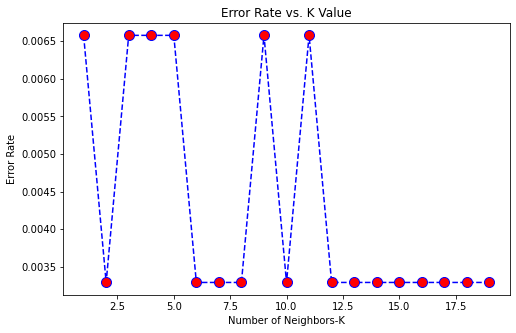

Minimum error:  0.00329 at K = 2


In [107]:
# No changes are needed in this cell. However, you can change the variable names etc.
error_rate = []

for i in range(1,20): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(8,5))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors-K')
plt.ylabel('Error Rate')
plt.show()

min_val = 1+error_rate.index(min(error_rate))
print("Minimum error: ",np.around(min(error_rate),decimals=5),"at K =", min_val)

**Question 6:** Now that you know the optimum value for K, create another model using this value. Also predict using X_train (as well as X_test) and store their results in separate variables. We will use that in the next question. <br>

In [108]:
# Create KNN Classifier
neigh = KNeighborsClassifier(n_neighbors=2)

# Train the model using the training sets
neigh.fit(X_train, y_train)

# Predict the response for Test data
y_pred_test = neigh.predict(X_test)

# Predict the response for Train data
y_pred_train = neigh.predict(X_train)


### Evaluation Metrics

**Question 7:**  The final part of the modelling process is evaluation of the model. There a different metrices that we can use to do so. Scikit Learn has in-built functions for calculating each metric. Look up for these functions and print the following: 

*   Train Accuracy
*   Test Accuracy
*   F1 Score
*   Precision
*   Recall

In [109]:
# Enter Code here
test_acc = accuracy_score(y_test, y_pred_test)
test_f1_sc = f1_score(y_test, y_pred_test)
test_pre = precision_score(y_test, y_pred_test)
test_rec = recall_score(y_test, y_pred_test)

train_acc = accuracy_score(y_train, y_pred_train)
train_f1_sc = f1_score(y_train, y_pred_train)
train_pre = precision_score(y_train, y_pred_train)
train_rec = recall_score(y_train, y_pred_train)

print('Accuracy on Test data: ', test_acc)
print('F1-score on Test data: ', test_f1_sc)
print('Precision on Test data: ', test_pre)
print('Recall on Test data: ', test_rec)

print('\nAccuracy on Training data: ', train_acc)
print('F1-score on Training data: ', train_f1_sc)
print('Precision on Training data: ', train_pre)
print('Recall on Training data: ', train_rec)

Accuracy on Test data:  0.9967105263157895
F1-score on Test data:  0.9979381443298969
Precision on Test data:  0.9958847736625515
Recall on Test data:  1.0

Accuracy on Training data:  1.0
F1-score on Training data:  1.0
Precision on Training data:  1.0
Recall on Training data:  1.0


**Question 8:** As a final exercise, we want to summarize our prediction results using a confusion matrix. Create and display a confusion matrix that shows the test predictions. Again, use sklearn's built in function for the purpose.

**Note:** Do not forget to label the plot properly.

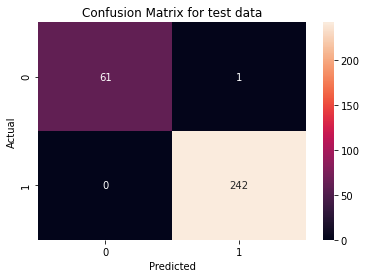

In [110]:
# Enter Code here
conf_mat = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_mat, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for test data')
plt.ylabel('Actual');

**Question 9:** Do the above results validate the accuracy, recall, and precision scores that you received in **Question 7**? <br>Manually calculate the accuracy, precision, and recall of the test predicitions. Do not forget to state the formula you used for each.

Yes, if we calculate these scores manually we get the same results as of Question 7

Precision = TruePositives / (TruePositives + FalsePositives)

Recall = TruePositives / (TruePositives + FalseNegatives)

Accuracy = TruePositives + TrueNegatives / (TruePositives + FalsePositives + TrueNegatives + FalseNegatives)

F1_Score = (2*Precision*Recall) / (Precision + Recall)

### Yayy, Good Job!

Congratulations! You have successfully completed your assignment on creating machine learning models. In this part, we saw how implementations are already available in libraries such as Scikit Learn, which streamlines the entire process of machine learning. Various parameters can also be tuned in order to increase performances. <br> We hope that you enjoyed this assignment, and have gained some hands on experience of building machine learning models and classifiers. <br> 

This also wraps up CS334's assignments. Good job and all the best for the remaining semester! :')